In [432]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# 6.2 Data cleaning and preparation
* Downloading the dataset
* Re-encoding the categorical variables
* Doing the train/validation/test split

In [309]:
df = pd.read_csv('../data/credit_scoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [310]:
df.columns = df.columns.str.lower()
df.head()


,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [311]:
status_mapping =  {
  1: 'ok',
  2: 'default',
  0: 'unk'
}

df.status = df.status.map(status_mapping)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)


In [312]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [313]:
# A couple of columns have 99999999.0 as null
df.describe().round()


,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [314]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)


In [315]:
df.describe().round()


,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [316]:
df.status.value_counts()


ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [317]:
# Removing unk values
df = df[df.status != 'unk'].reset_index(drop=True)
df.head()


,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


In [318]:
df.status.value_counts()


ok         3200
default    1254
Name: status, dtype: int64

In [319]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)


In [320]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [321]:
y_train = (df_train.status == 'default').astype('int')
y_val = (df_val.status == 'default').astype('int')
y_test = (df_test.status == 'default').astype('int')


In [322]:
del df_train['status']
del df_val['status']
del df_test['status']


# 6.3 Decision trees
* How a decision tree looks like
* Training a decision tree
* Overfitting
* Controlling the size of a tree


In [323]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

client = df_train.iloc[0].to_dict()

In [324]:
assess_risk(client)


'default'

In [325]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [326]:
train_dicts = df_train.fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)


In [327]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [328]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [329]:
y_pred = dt.predict_proba(X_val)[:,1]

In [330]:
y_pred = dt.predict_proba(X_val)[:,1]

In [331]:

y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)


0.9999996473061242

**overfitting**
The model memorizes the data but fails to generalize. That's why the score of val prediction is low.
We need to reduce the tree's depth.

In [332]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print('val auc: ', auc)

y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)

print('train auc: ', auc)

val auc:  0.7455663974313953
train auc:  0.774310483472765


In [333]:

print(export_text(dt, feature_names=list(dv.get_feature_names_out())))


|--- seniority <= 2.50
|   |--- records=no <= 0.50
|   |   |--- income <= 136.50
|   |   |   |--- class: 1
|   |   |--- income >  136.50
|   |   |   |--- class: 1
|   |--- records=no >  0.50
|   |   |--- job=fixed <= 0.50
|   |   |   |--- class: 0
|   |   |--- job=fixed >  0.50
|   |   |   |--- class: 0
|--- seniority >  2.50
|   |--- records=no <= 0.50
|   |   |--- assets <= 3450.00
|   |   |   |--- class: 1
|   |   |--- assets >  3450.00
|   |   |   |--- class: 0
|   |--- records=no >  0.50
|   |   |--- income <= 93.50
|   |   |   |--- class: 0
|   |   |--- income >  93.50
|   |   |   |--- class: 0



# 6.4 Decision tree learning algorithm
* Finding the best split for one column
* Finding the best split for the entire dataset
* Stopping criteria
* Decision tree learning algorithm


In [334]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [335]:
df_example.sort_values('assets')


,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [336]:
Ts = [0, 2000,3000,4000,5000,8000]


In [337]:
from IPython.display import display

In [338]:
results = []
for t in Ts:
    df_left = df_example[df_example.assets <= t]
    df_right = df_example[df_example.assets > t]

    left_status = df_left.status.value_counts(normalize=True).to_dict()
    right_status = df_right.status.value_counts(normalize=True).to_dict()
    left_impurity = left_status['ok'] if 'ok' in left_status else 0
    right_impurity = right_status['default'] if 'default' in right_status else 0
    results.append((t, left_impurity, right_impurity, (left_impurity + right_impurity) / 2))

pd.DataFrame(results, columns=['threshold', 'left_impurity', 'right_impurity', 'average_impurity']).sort_values('average_impurity')


,threshold,left_impurity,right_impurity,average_impurity
2,3000,0.000000,0.200000,0.100000
1,2000,0.000000,0.333333,0.166667
0,0,0.000000,0.428571,0.214286
5,8000,0.428571,0.000000,0.214286
3,4000,0.250000,0.250000,0.250000
4,5000,0.500000,0.500000,0.500000


In [339]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [340]:
df_example.sort_values('debt')


,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [341]:
thresholds = {
    'assets': [0, 2000,3000,4000,5000,8000],
    'debt': [500, 1000, 2000],
}


In [342]:
results = []
for feature, Ts in thresholds.items():
    for t in Ts:
        df_left = df_example[df_example.assets <= t]
        df_right = df_example[df_example.assets > t]

        left_status = df_left.status.value_counts(normalize=True).to_dict()
        right_status = df_right.status.value_counts(normalize=True).to_dict()
        left_impurity = left_status['ok'] if 'ok' in left_status else 0
        right_impurity = right_status['default'] if 'default' in right_status else 0
        results.append((feature, t, left_impurity, right_impurity, (left_impurity + right_impurity) / 2))

pd.DataFrame(results, columns=['feature', 'threshold', 'left_impurity', 'right_impurity', 'average_impurity']).sort_values('average_impurity').sort_values('average_impurity').head(1)


,feature,threshold,left_impurity,right_impurity,average_impurity
2,assets,3000,0.0,0.2,0.1


### Decision tree learning algorithm
* Find the best split
* Stop if max_depth is reached
* If left is sufficiently large and not pure:
    * Repeat for left
* If right is sufficiently large and not pure:
    * Repeat for right


# 6.5 Decision trees parameter tuning
* selecting max_depth
* selecting min_samples_leaf

In [343]:
scores = []
for d in [1,2,3,4,5,6,10,15,20,None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((d, auc))

scores


[(1, 0.6432674459439122),
 (2, 0.7128913108914865),
 (3, 0.7455663974313953),
 (4, 0.7550262128129233),
 (5, 0.7634983444539207),
 (6, 0.7640094315958461),
 (10, 0.6891335975517985),
 (15, 0.6648585260623088),
 (20, 0.6508679074900918),
 (None, 0.6503223298048462)]

In [344]:
scores = []
for d in [4,5,6,7,10,15,20,None]:
    for s in [1,2,3,4,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))

df_scores = pd.DataFrame(scores, columns=['max_depth','min_samples_leaf', 'auc']).sort_values('auc', ascending=False)
df_scores.head()


,max_depth,min_samples_leaf,auc
28,6.0,15,0.784406
27,6.0,10,0.778828
29,6.0,20,0.777555
72,20.0,15,0.777273
24,6.0,3,0.776711


In [345]:
df_scores_pivot = df_scores.pivot(index = 'min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot


auc                                                    \
max_depth              NaN      4.0       5.0       6.0       7.0       10.0   
min_samples_leaf                                                               
1                 0.658070  0.755026  0.764091  0.773469  0.739502  0.676635   
2                 0.667492  0.755026  0.767700  0.769189  0.751944  0.701704   
3                 0.703027  0.755026  0.766860  0.776711  0.759466  0.710317   
4                 0.707690  0.755026  0.767041  0.775956  0.759432  0.725763   
5                 0.726499  0.755227  0.767656  0.774868  0.761896  0.732435   
10                0.751750  0.752769  0.768255  0.778828  0.769628  0.752885   
15                0.775250  0.761974  0.774952  0.784406  0.771102  0.770224   
20                0.769014  0.761974  0.765969  0.777555  0.771124  0.770349   
100               0.770193  0.762470  0.768935  0.770014  0.769544  0.770193   
200               0.759626  0.754311  0.758855  0.759626  0.759626  0.759626   
500               0.697443  0.697443  0.697443  0.697443  0.697443  0.697443   

                                      
max_depth             15.0      20.0  
min_samples_leaf                      
1                 0.641781  0.646052  
2                 0.677419  0.685901  
3                 0.699641  0.702811  
4                 0.702670  0.701340  
5                 0.729763  0.736834  
10                0.748529  0.753211  
15                0.775573  0.777273  
20                0.769735  0.769277  
100               0.770193  0.770193  
200               0.759626  0.759626  
500               0.697443  0.697443

<AxesSubplot: xlabel='None-max_depth', ylabel='min_samples_leaf'>

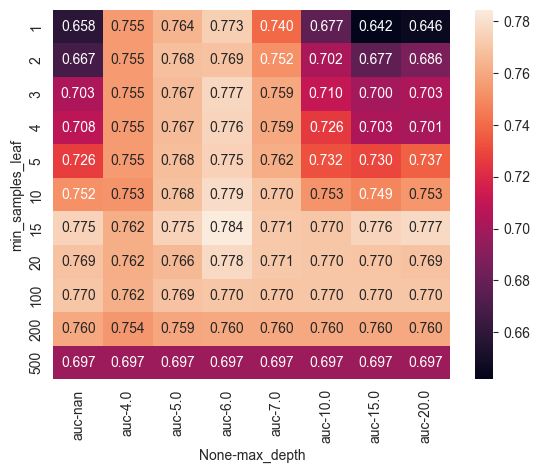

In [346]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')


In [347]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

# 6.6 Ensembles and random forest
* Board of experts
* Ensembling models
* Random forest - ensembling decision trees
* Tuning random forest

In [348]:
from sklearn.ensemble import RandomForestClassifier


In [349]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=1)

In [350]:
y_pred = rf.predict_proba(X_val)[:,1]


In [351]:
roc_auc_score(y_val, y_pred)


0.788563562935835

In [352]:
scores = []
for e in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=e, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((e, auc))


In [353]:
df_scores = pd.DataFrame(scores, columns=['estimators', 'auc'])


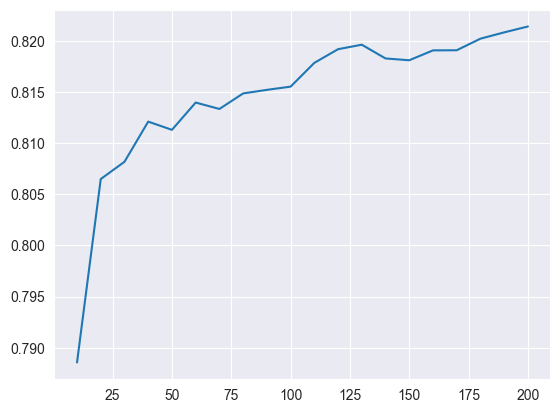

In [354]:
plt.plot(df_scores.estimators, df_scores.auc)


In [355]:
scores = []
for d in [5,10,15]:
    for e in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=e, random_state=1, max_depth=d)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, e, auc))


In [356]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'estimators', 'auc'])
df_scores.head()


,max_depth,estimators,auc
0,5,10,0.810271
1,5,20,0.815974
2,5,30,0.818790
3,5,40,0.818953
4,5,50,0.819423


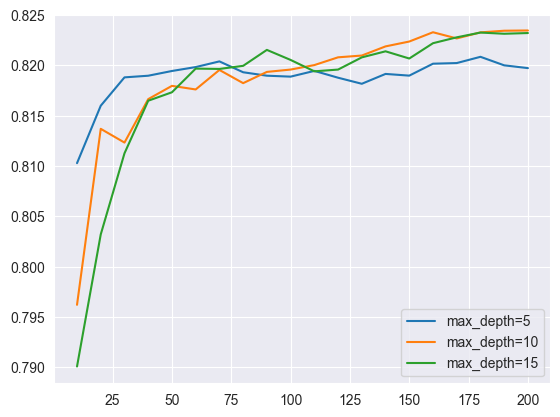

In [357]:
for d in [5,10,15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.estimators, df_subset.auc, label='max_depth=%d' % d)

plt.legend()


In [358]:
max_depth = 10


In [359]:
scores = []
for s in [1,3,5,10,50]:
    for e in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=e, random_state=1, max_depth=max_depth, min_samples_leaf=s)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, e, auc))


In [360]:
df_scores = pd.DataFrame(scores, columns=['min_samples_leaf', 'estimators', 'auc'])
df_scores.head()


,min_samples_leaf,estimators,auc
0,1,10,0.796205
1,1,20,0.813679
2,1,30,0.812315
3,1,40,0.816629
4,1,50,0.817946


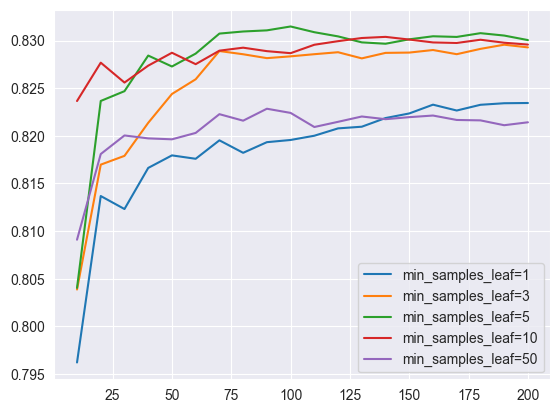

In [361]:
for s in [1,3,5,10,50]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.estimators, df_subset.auc, label='min_samples_leaf=%d' % s)

plt.legend()


In [362]:
min_samples_leaf = 5

In [363]:
rf = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=max_depth, min_samples_leaf=s)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=50, random_state=1)

# 6.7 Gradient boosting and XGBoost
* Gradient boosting vs random forest
* Installing XGBoost
* Training the first model
* Performance monitoring
* Parsing xgboost's monitoring output


In [364]:
import xgboost as xgb


In [365]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)


In [366]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 42,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=10)


In [367]:
y_pred = model.predict(dval)


In [368]:
roc_auc_score(y_val, y_pred)


0.8254276827371696

In [369]:
%%capture output

watchlist = [(dtrain, 'train'), (dval, 'val')]
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 42,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=200)


In [370]:
def parse_xgb_output(s):
    results = []
    for l in s.strip().split('\n'):
        it_line, train_line, val_line = l.split('\t')
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    df_results = pd.DataFrame(results, columns=['num_iter', 'train_auc', 'val_auc'])
    return df_results

df_score = parse_xgb_output(output.stdout)


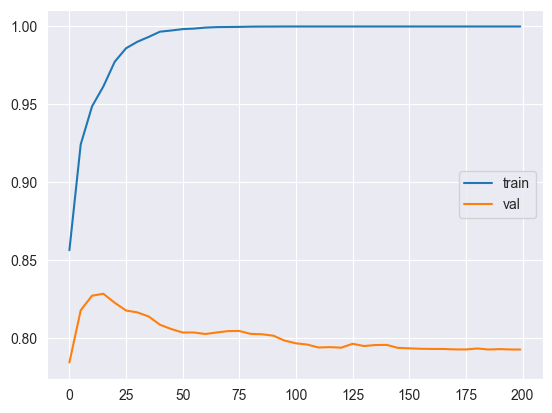

In [371]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')

plt.legend()


# 6.8 XGBoost parameter tuning
Tuning the following parameters:

* eta
* max_depth
* min_child_weight

In [372]:
scores = {}

In [388]:
%%capture output

watchlist = [(dtrain, 'train'), (dval, 'val')]
xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 42,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=200)


In [389]:
key = 'eta=%s' % xgb_params['eta']
scores[key] = parse_xgb_output(output.stdout)


In [390]:
scores[key]


,num_iter,train_auc,val_auc
0,0,0.85639,0.78434
1,5,0.86080,0.78671
2,10,0.87142,0.78577
3,15,0.87514,0.78521
4,20,0.88648,0.79419
5,25,0.89122,0.79844
6,30,0.89412,0.80115
7,35,0.89595,0.80008
8,40,0.89864,0.80163
9,45,0.90042,0.80245


In [391]:
scores.keys()


dict_keys(['eta=0.3', 'eta=0.1', 'eta=0.05', 'eta=1', 'eta=0.01'])

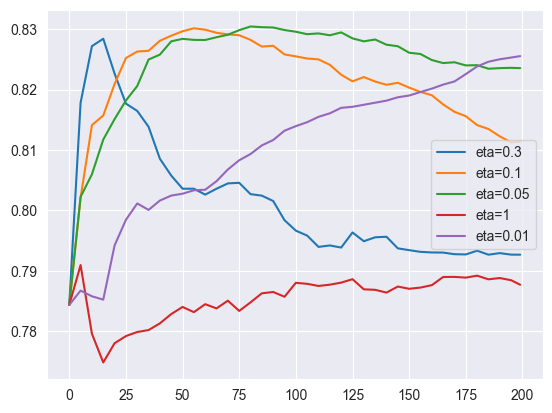

In [393]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)

plt.legend()


In [394]:
eta = 0.1
scores = {}


In [401]:
%%capture output

watchlist = [(dtrain, 'train'), (dval, 'val')]
xgb_params = {
    'eta': eta,
    'max_depth': 10,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 42,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=200)


In [402]:
key = 'max_depth=%s' % xgb_params['max_depth']
scores[key] = parse_xgb_output(output.stdout)


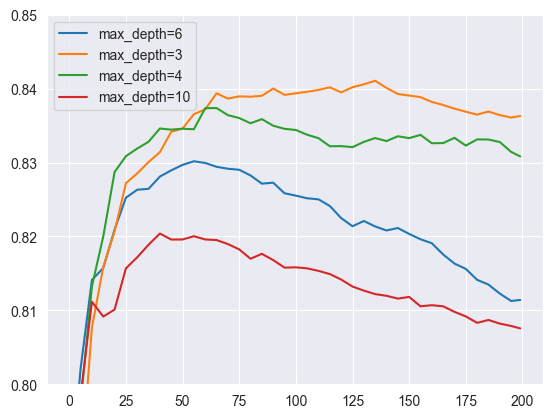

In [404]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)

plt.ylim(0.8,0.85)
plt.legend()


In [405]:
max_depth = 3
scores = {}

In [410]:
%%capture output

watchlist = [(dtrain, 'train'), (dval, 'val')]
xgb_params = {
    'eta': eta,
    'max_depth': max_depth,
    'min_child_weight': 30,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 42,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=200)


In [411]:
key = 'min_child_weight=%s' % xgb_params['min_child_weight']
scores[key] = parse_xgb_output(output.stdout)


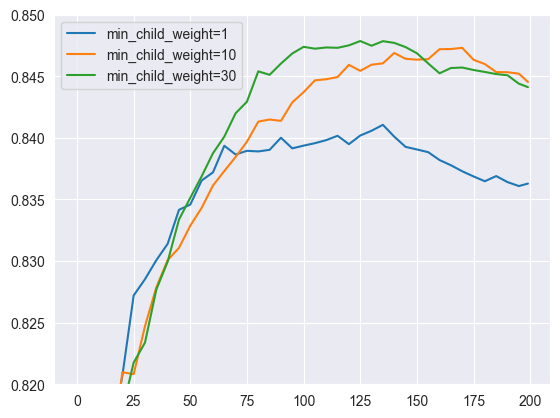

In [413]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.ylim(0.82, 0.85)
plt.legend()


In [415]:
min_child_weight = 30


In [416]:
xgb_params = {
    'eta': eta,
    'max_depth': max_depth,
    'min_child_weight': min_child_weight,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 42,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, verbose_eval=5, num_boost_round=175)


In [417]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)


0.845827271359053

Other parameters: https://xgboost.readthedocs.io/en/latest/parameter.html

Useful ones:

* subsample and colsample_bytree
* lambda and alpha

# 6.9 Selecting the final model
* Choosing between xgboost, random forest and decision tree
* Training the final model
* Saving the model

In [426]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 42,
    'verbosity': 1,
}
xgb_model = xgb.train(xgb_params, dtrain, verbose_eval=5, num_boost_round=175)

In [425]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=1, max_depth=10, min_samples_leaf=5)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

In [427]:
dt_model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [428]:
y_pred = dt_model.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)


0.7844058847137912

In [429]:
y_pred = rf_model.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)


0.830049415542066

In [431]:
y_pred = xgb_model.predict(dval)
roc_auc_score(y_val, y_pred)


0.845827271359053

In [434]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = (df_full_train.status == 'default').astype('int').values

In [435]:
del df_full_train['status']


In [436]:
dict_full_train = df_full_train.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dict_full_train)
X_test = dv.transform(dict_test)


In [437]:
dfull_train = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=dv.get_feature_names_out())
dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names_out())


In [438]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 42,
    'verbosity': 1,
}
xgb_model = xgb.train(xgb_params, dfull_train, verbose_eval=5, num_boost_round=175)


In [440]:
y_pred = xgb_model.predict(dtest)
roc_auc_score(y_test, y_pred)


0.8472074938140686

# 6.10 Summary
* Decision trees learn if-then-else rules from data.
* Finding the best split: select the least impure split. This algorithm can overfit, that's why we control it by limiting the max depth and the size of the group.
* Random forest is a way of combininig multiple decision trees. It should have a diverse set of models to make good predictions.
* Gradient boosting trains model sequentially: each model tries to fix errors of the previous model. XGBoost is an implementation of gradient boosting.

# 6.11 Explore more
* For this dataset we didn't do EDA or feature engineering. You can do it to get more insights into the problem.
* For random forest, there are more parameters that we can tune. Check max_features and bootstrap.
* There's a variation of random forest caled "extremely randomized trees", or "extra trees". Instead of selecting the best split among all possible thresholds, it selects a few thresholds randomly and picks the best one among them. Because of that extra trees never overfit. In Scikit-Learn, they are implemented in ExtraTreesClassifier. Try it for this project.
* XGBoost can deal with NAs - we don't have to do fillna for it. Check if not filling NA's help improve performance.
* Experiment with other XGBoost parameters: subsample and colsample_bytree.
* When selecting the best split, decision trees find the most useful features. This information can be used for understanding which features are more important than otheres. See example here for random forest (it's the same for plain decision trees) and for xgboost
* Trees can also be used for solving the regression problems: check DecisionTreeRegressor, RandomForestRegressor and the objective=reg:squarederror parameter for XGBoost.
